In [0]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 5.4 MB/s 
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:
!pip install yfinance

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:
## Importing libraries
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import pyspark.sql.functions as f
import numpy as np
import pandas as pd
import seaborn as sns
from pyspark.sql.types import StringType, DateType, FloatType
from pyspark.sql.types import *
from pyspark.sql.functions import *
import warnings; warnings.simplefilter('ignore')
from mlxtend.plotting import scatterplotmatrix
%matplotlib inline

To describe the relationship between oil price and stock price, we merged two datasets. 

We have got our oil price dataset from the U.S Energy Information Administration. (https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=rbrte&f=D).

We selected 3 top oil companies- Exxon Mobil(XOM),Chevron(CVX) and Conoco Phillips(COP). We got their stock price data using Yahoo Finance API. Then we merged these two datasets to analyze whether oil price and stock price are correlated and affect each other. This analysis will help us to take an investment decision.

For this analysis, we have selected the period from January 2000 to April 2022.

In [0]:
# Using yfinance API to get the stock data of three companies
stock=["COP","XOM", "CVX"] 
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2022,2,28)
SP = yf.download(stock,start=start,end = end, interval='1d')

[*********************100%***********************]  3 of 3 completed


In [0]:
SP.head()

Adj Close 
 Close 
 High 
 Low 
 Open 
 Volume 
 
 
 
 COP 
 CVX 
 XOM 
 COP 
 CVX 
 XOM 
 COP 
 CVX 
 XOM 
 COP 
 CVX 
 XOM 
 COP 
 CVX 
 XOM 
 COP 
 CVX 
 XOM 
 
 
 Date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2000-01-03 
 8.652066 
 18.311800 
 19.472002 
 17.271235 
 41.81250 
 39.15625 
 17.771505 
 42.93750 
 40.37500 
 17.247412 
 41.28125 
 38.93750 
 17.723860 
 42.93750 
 39.75000 
 1862219 
 4387600 
 13458200 
 
 
 2000-01-04 
 8.484990 
 18.311800 
 19.099052 
 16.937721 
 41.81250 
 38.40625 
 17.247412 
 42.06250 
 39.09375 
 16.842430 
 41.25000 
 38.25000 
 17.104479 
 41.46875 
 38.68750 
 1472879 
 3702400 
 14510800 
 
 
 2000-01-05 
 8.329843 
 18.640278 
 20.140251 
 16.628031 
 42.56250 
 40.50000 
 17.128300 
 43.28125 
 40.87500 
 16.461273 
 41.53125 
 38.90625 
 17.033010 
 41.53125 
 39.00000 
 4075997 
 5567600 
 17485000 
 
 
 2000-01-06 
 8.616260 
 19.434059 
 21.181437 
 17.199766 
 44.37500 
 42.59375 
 17.390347 
 44.59375 
 42.90625 
 16.485096 
 42.65625 
 40.09375 
 16.675674 
 42.65625 
 40.31250 
 2719867 
 4353400 
 19461600 
 
 
 2000-01-07 
 8.616260 
 19.776211 
 21.119287 
 17.199766 
 45.15625 
 42.46875 
 17.461815 
 45.43750 
 43.12500 
 17.152122 
 44.50000 
 42.00000 
 17.342703 
 45.00000 
 42.96875 
 1762785 
 4487400 
 16603800

In [0]:
# Keeping only the closing price
stock_prices = SP['Close']

In [0]:
# Resetting index
stock_prices.reset_index(inplace = True)
display(stock_prices)

Date,COP,CVX,XOM
2000-01-03T00:00:00.000+0000,17.2712345123291,41.8125,39.15625
2000-01-04T00:00:00.000+0000,16.937721252441406,41.8125,38.40625
2000-01-05T00:00:00.000+0000,16.62803077697754,42.5625,40.5
2000-01-06T00:00:00.000+0000,17.199766159057617,44.375,42.59375
2000-01-07T00:00:00.000+0000,17.199766159057617,45.15625,42.46875
2000-01-10T00:00:00.000+0000,17.152122497558594,43.9375,41.875
2000-01-11T00:00:00.000+0000,17.128299713134766,43.53125,42.0
2000-01-12T00:00:00.000+0000,16.79478645324707,43.375,41.75
2000-01-13T00:00:00.000+0000,16.8186092376709,43.78125,42.71875
2000-01-14T00:00:00.000+0000,16.675674438476562,43.5,41.875


In [0]:
# Setting the column name
stock_column= ["Date","COP_stock_price","CVX_stock_price","XOM_stock_price"]
stock_price_df = spark.createDataFrame(stock_prices,stock_column)

In [0]:
# Checking the schemas
stock_price_df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- COP_stock_price: double (nullable = true)
 |-- CVX_stock_price: double (nullable = true)
 |-- XOM_stock_price: double (nullable = true)



In [0]:
# Setting the schemas
stock_price_df= stock_price_df.withColumn("Date" ,
              stock_price_df["Date"]
              .cast(DateType())).withColumn("COP_stock_price",
              stock_price_df["COP_stock_price"]
              .cast(FloatType())).withColumn("CVX_stock_price",
              stock_price_df["CVX_stock_price"]
              .cast(FloatType())).withColumn("XOM_stock_price",
              stock_price_df["XOM_stock_price"]
              .cast(FloatType()))

stock_price_df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- COP_stock_price: float (nullable = true)
 |-- CVX_stock_price: float (nullable = true)
 |-- XOM_stock_price: float (nullable = true)



In [0]:
# New stock price dataframe
stock_price_df.show(5)

+----------+---------------+---------------+---------------+
|      Date|COP_stock_price|CVX_stock_price|XOM_stock_price|
+----------+---------------+---------------+---------------+
|2000-01-03|      17.271235|        41.8125|       39.15625|
|2000-01-04|      16.937721|        41.8125|       38.40625|
|2000-01-05|       16.62803|        42.5625|           40.5|
|2000-01-06|      17.199766|         44.375|       42.59375|
|2000-01-07|      17.199766|       45.15625|       42.46875|
+----------+---------------+---------------+---------------+
only showing top 5 rows



We have uploaded the oil price dataset into the databrick file system

In [0]:
%fs ls dbfs:/FileStore/shared_uploads/nazianoor.3007@gmail.com/Oil_Price-2.csv

path,name,size,modificationTime
dbfs:/FileStore/shared_uploads/nazianoor.3007@gmail.com/Oil_Price-2.csv,Oil_Price-2.csv,159216,1651955715000


In [0]:
oil_price = "dbfs:/FileStore/shared_uploads/nazianoor.3007@gmail.com/Oil_Price-2.csv"


In [0]:
%fs head dbfs:/FileStore/shared_uploads/nazianoor.3007@gmail.com/Oil_Price-2.csv


[Truncated to first 65536 bytes]
﻿Date,Europe Brent Spot Price FOB (Dollars per Barrel)
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.6
1987-05-26,18.63
1987-05-27,18.6
1987-05-28,18.6
1987-05-29,18.58
1987-06-01,18.65
1987-06-02,18.68
1987-06-03,18.75
1987-06-04,18.78
1987-06-05,18.65
1987-06-08,18.75
1987-06-09,18.78
1987-06-10,18.78
1987-06-11,18.68
1987-06-12,18.78
1987-06-16,18.9
1987-06-17,19.03
1987-06-18,19.05
1987-06-19,19.05
1987-06-22,19.1
1987-06-23,18.9
1987-06-24,18.75
1987-06-25,18.7
1987-06-26,19.08
1987-06-29,19.15
1987-06-30,19.08
1987-07-01,18.98
1987-07-02,19.25
1987-07-03,19.33
1987-07-06,19.48
1987-07-07,19.5
1987-07-08,19.48
1987-07-09,19.68
1987-07-10,19.73
1987-07-13,19.83
1987-07-14,19.88
1987-07-15,20.28
1987-07-16,20.4
1987-07-17,20.63
1987-07-20,20.55
1987-07-21,20.35
1987-07-22,20.33
1987-07-23,20.15
1987-07-24,19.58
1987-07-27,19.3
1987-07-28,19.78
1987-07-29,19.98
1987-07-30,20.2
1987-07-31,20.03
1987-08-03,20.95
1987-08-04,20.65
1987-08-05,19.8
1987-08-06,19.75
1987-08-07,19.65
1987-08-10,19.43
1987-08-11,19.45
1987-08-12,19.5
1987-08-13,19.4
1987-08-14,19.25
1987-08-17,18.85
1987-08-18,18.75
1987-08-19,18.5
1987-08-20,18.3
1987-08-21,18.1
1987-08-24,17.48
1987-08-25,17.55
1987-08-26,18.1
1987-08-27,18.28
1987-08-28,18.2
1987-08-31,18.63
1987-09-01,18.43
1987-09-02,18.4
1987-09-03,18.18
1987-09-04,18.13
1987-09-07,17.6
1987-09-08,17.68
1987-09-09,17.9
1987-09-10,18.3
1987-09-11,18.18
1987-09-14,18.15
1987-09-15,18.53
1987-09-16,18.53
1987-09-17,18.43
1987-09-18,18.3
1987-09-21,18.28
1987-09-22,18.48
1987-09-23,18.48
1987-09-24,18.68
1987-09-25,18.6
1987-09-28,18.65
1987-09-29,18.5
1987-09-30,18.48
1987-10-01,18.5
1987-10-02,18.65
1987-10-05,18.78
1987-10-06,18.6
1987-10-07,18.58
1987-10-08,18.63
1987-10-09,18.6
1987-10-12,18.55
1987-10-13,18.55
1987-10-14,18.68
1987-10-15,18.68
1987-10-16,19
1987-10-19,19.1
1987-10-20,18.78
1987-10-21,18.93
1987-10-22,19.13
1987-10-23,18.98
1987-10-26,18.75
1987-10-27,18.8
1987-10-28,18.85
1987-10-29,18.75
1987-10-30,18.8
1987-11-02,18.63
1987-11-03,18.38
1987-11-04,17.93
1987-11-05,17.85
1987-11-06,17.95
1987-11-09,17.5
1987-11-10,17.75
1987-11-11,17.8
1987-11-12,17.85
1987-11-13,17.8
1987-11-16,17.68
1987-11-17,17.4
1987-11-18,17.18
1987-11-19,17.48
1987-11-20,17.6
1987-11-23,17.9
1987-11-24,17.83
1987-11-25,17.68
1987-11-26,17.73
1987-11-27,17.78
1987-11-30,17.7
1987-12-01,17.65
1987-12-02,17.7
1987-12-03,17.93
1987-12-04,18
1987-12-07,17.78
1987-12-08,17.58
1987-12-09,17.43
1987-12-10,17.55
1987-12-11,17.73
1987-12-14,16.8
1987-12-15,16.2
1987-12-16,15.93
1987-12-17,15.03
1987-12-18,15.6
1987-12-21,15.4
1987-12-22,16.7
1987-12-23,17.25
1987-12-24,17.1
1987-12-28,17
1987-12-29,17.38
1987-12-30,17.85
1987-12-31,17.6
1988-01-04,17.95
1988-01-05,17.08
1988-01-06,17.9
1988-01-08,16.88
1988-01-11,16.65
1988-01-12,15.95
1988-01-13,16.38
1988-01-14,16.55
1988-01-15,16.65
1988-01-18,16.83
1988-01-19,17.1
1988-01-20,16.83
1988-01-21,17.08
1988-01-22,16.7
1988-01-25,16.45
1988-01-27,16.13
1988-01-28,16.1
1988-01-29,16.28
1988-02-01,16.1
1988-02-02,16.18
1988-02-03,16.15
1988-02-04,16.18
1988-02-05,16.1
1988-02-08,16.5
1988-02-09,16.4
1988-02-10,16.13
1988-02-11,16.1
1988-02-12,15.75
1988-02-15,15.68
1988-02-16,15.63
1988-02-17,15.85
1988-02-18,15.48
1988-02-19,15.55
1988-02-22,15.38
1988-02-23,15.58
1988-02-24,15.35
1988-02-25,14.85
1988-02-26,14.65
1988-02-29,14.73
1988-03-01,14.18
1988-03-02,13.8
1988-03-03,14
1988-03-04,14
1988-03-07,13.9
1988-03-08,13.8
1988-03-09,13.98
1988-03-10,14.48
1988-03-11,14.88
1988-03-14,14.28
1988-03-15,14.3
1988-03-16,14.45
1988-03-17,14.43
1988-03-18,14.93
1988-03-21,15.38
1988-03-22,15.03
1988-03-23,15.4
1988-03-24,15.65
1988-03-25,15.45
1988-03-28,15.55
1988-03-29,15.6
1988-03-30,15.7
1988-03-31,

In [0]:
#Setting schema for oil price dataset
oil_schema = StructType([StructField('Date', DateType(), True),
                     StructField('Europe Brent Spot Price FOB (Dollars per Barrel)', FloatType(), True)])

In [0]:
oil_price_df = spark.read.csv(oil_price, header=True, schema=oil_schema)
oil_price_df.show()

+----------+------------------------------------------------+
|      Date|Europe Brent Spot Price FOB (Dollars per Barrel)|
+----------+------------------------------------------------+
|1987-05-20|                                           18.63|
|1987-05-21|                                           18.45|
|1987-05-22|                                           18.55|
|1987-05-25|                                            18.6|
|1987-05-26|                                           18.63|
|1987-05-27|                                            18.6|
|1987-05-28|                                            18.6|
|1987-05-29|                                           18.58|
|1987-06-01|                                           18.65|
|1987-06-02|                                           18.68|
|1987-06-03|                                           18.75|
|1987-06-04|                                           18.78|
|1987-06-05|                                           18.65|
|1987-06

Now we will merge oil_price_df and stock_price_df.

In [0]:
oil_price_df.cache()

Out[37]: DataFrame[Date: date, Europe Brent Spot Price FOB (Dollars per Barrel): float]

In [0]:
stock_price_df.cache()

Out[38]: DataFrame[Date: date, COP_stock_price: float, CVX_stock_price: float, XOM_stock_price: float]

In [0]:
oil_price_df.count()

Out[39]: 8873

In [0]:
stock_price_df.count()

Out[40]: 5574

In [0]:
merged_df= oil_price_df.join(stock_price_df,["Date"])
merged_df.show()

+----------+------------------------------------------------+---------------+---------------+---------------+
|      Date|Europe Brent Spot Price FOB (Dollars per Barrel)|COP_stock_price|CVX_stock_price|XOM_stock_price|
+----------+------------------------------------------------+---------------+---------------+---------------+
|2000-01-04|                                           23.95|      16.937721|        41.8125|       38.40625|
|2000-01-05|                                           23.72|       16.62803|        42.5625|           40.5|
|2000-01-06|                                           23.55|      17.199766|         44.375|       42.59375|
|2000-01-07|                                           23.35|      17.199766|       45.15625|       42.46875|
|2000-01-10|                                           22.77|      17.152122|        43.9375|         41.875|
|2000-01-11|                                           23.93|        17.1283|       43.53125|           42.0|
|2000-01-1

In [0]:
# renaming a column name
oil_stock_price_df = merged_df.withColumnRenamed("Europe Brent Spot Price FOB (Dollars per Barrel)","oil_price")
oil_stock_price_df.show()

+----------+---------+---------------+---------------+---------------+
|      Date|oil_price|COP_stock_price|CVX_stock_price|XOM_stock_price|
+----------+---------+---------------+---------------+---------------+
|2000-01-04|    23.95|      16.937721|        41.8125|       38.40625|
|2000-01-05|    23.72|       16.62803|        42.5625|           40.5|
|2000-01-06|    23.55|      17.199766|         44.375|       42.59375|
|2000-01-07|    23.35|      17.199766|       45.15625|       42.46875|
|2000-01-10|    22.77|      17.152122|        43.9375|         41.875|
|2000-01-11|    23.93|        17.1283|       43.53125|           42.0|
|2000-01-12|    24.62|      16.794786|         43.375|          41.75|
|2000-01-13|     24.9|       16.81861|       43.78125|       42.71875|
|2000-01-14|     25.5|      16.675674|           43.5|         41.875|
|2000-01-18|    26.31|      16.937721|       44.65625|         42.375|
|2000-01-19|    26.17|      16.794786|       43.96875|       42.78125|
|2000-

In [0]:
# checking schemas of the merged dataset
oil_stock_price_df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- oil_price: float (nullable = true)
 |-- COP_stock_price: float (nullable = true)
 |-- CVX_stock_price: float (nullable = true)
 |-- XOM_stock_price: float (nullable = true)



To check whether oil price and stock prices are correlated or not, we will perform the analysis through a heatmap and scatter matrix plot.

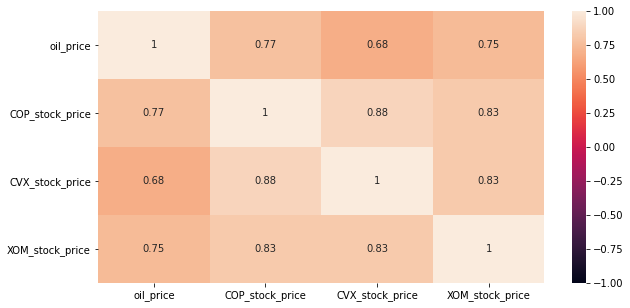

In [0]:
pandasDF = oil_stock_price_df.toPandas()
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(pandasDF.corr(), vmin=-1, vmax=1, annot=True)

As we can see in the heatmap, the correlation between oil price with the stock price of COP, CVX, and XOM is 77%,68%, and 75% respectively. So we can interpret that oil price and stock price variables are moderately correlated.

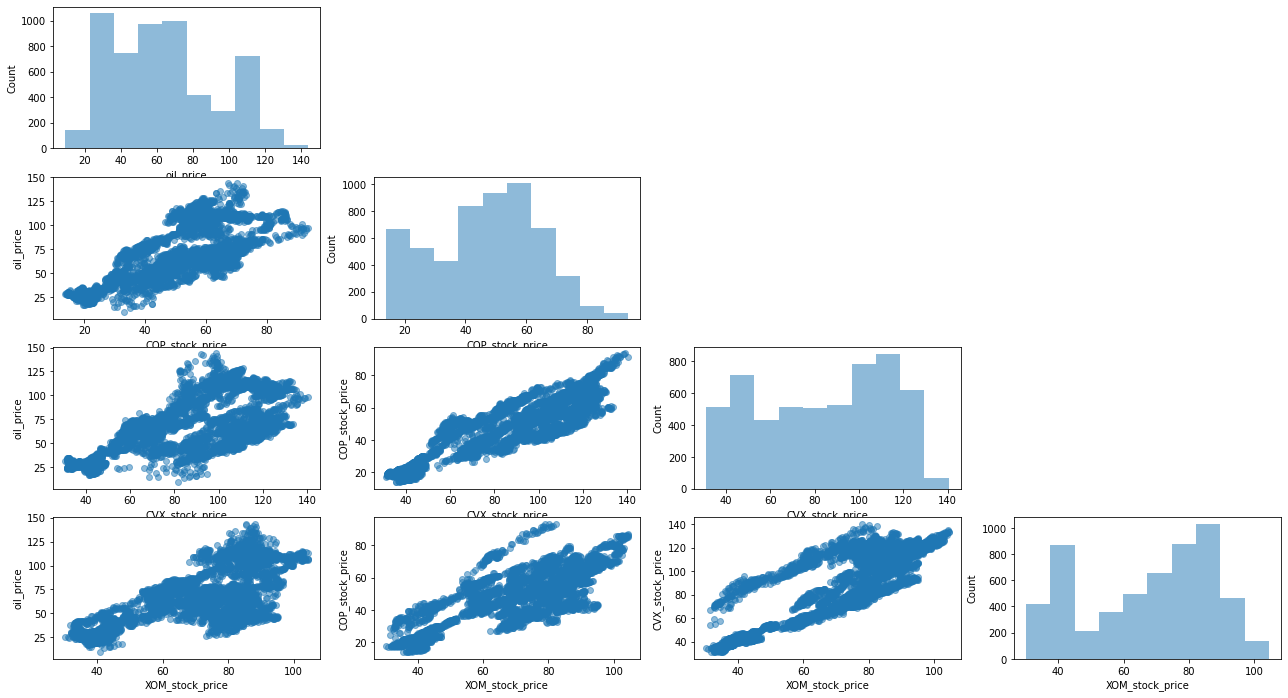

In [0]:
cols = ["oil_price","COP_stock_price","CVX_stock_price","XOM_stock_price"]
scatterplotmatrix(pandasDF[cols].values, figsize= (22,12), names=cols, alpha=0.5)
plt.show()

Above is the scattermatrix of all the four variables- oil price, stock price of XOM,stock price of CVX,stock price of COP. WE can observe a positive relationship between these variable since they are showing a upward trend.

## Final Analysis:

From the two above visualizations, we can say oil prices and stock prices of oil companies are moderately correlated. So oil price trends affect oil companies' stock prices as well. So if the oil price goes up, we can recommend our clients to invest in oil companies and if the oil price goes down, perhaps it will be a good decision to stay away from investing in oil companies.

After our analysis, we compressed our file to into snappy and converted it into Parquet file. We put our merged dataframe into Databrick **Delta Lake** so that data scientist can perform further analysis on this.

In [0]:
# Writing a parquet file
oil_stock_price_df.write.parquet("/tmp/output/oil_stock_price_df.parquet")

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
<command-3174576571316500> in <module>
      1 # Writing a parquet file
----> 2 oil_stock_price_df.write.parquet("/tmp/output/oil_stock_price_df.parquet")

/databricks/spark/python/pyspark/sql/readwriter.py in parquet(self, path, mode, partitionBy, compression)
    883             self.partitionBy(partitionBy)
    884         self._set_opts(compression=compression)
--> 885         self._jwrite.parquet(path)
    886 
    887     def text(self, path, compression=None, lineSep=None):

/databricks/spark/python/lib/py4j-0.10.9.1-src.zip/py4j/java_gateway.py in __call__(self, *args)
   1302 
   1303         answer = self.gateway_client.send_command(command)
-> 1304         return_value = get_return_value(
   1305             answer, self.gateway_client, self.target_id, self.name)
   1306 

/databricks/spark/python/pyspark/sql/utils.py in deco

In [0]:
# Reading a parquet file
parDf=spark.read.parquet("/tmp/output/oil_stock_price_df.parquet")

In [0]:
# Data scientist can do further analysis, modeling on this parquet file.
parDf.show(5)

+----------+---------+---------------+---------------+---------------+
|      Date|oil_price|COP_stock_price|CVX_stock_price|XOM_stock_price|
+----------+---------+---------------+---------------+---------------+
|2000-01-04|    23.95|      16.937721|        41.8125|       38.40625|
|2000-01-05|    23.72|       16.62803|        42.5625|           40.5|
|2000-01-06|    23.55|      17.199766|         44.375|       42.59375|
|2000-01-07|    23.35|      17.199766|       45.15625|       42.46875|
|2000-01-10|    22.77|      17.152122|        43.9375|         41.875|
+----------+---------+---------------+---------------+---------------+
only showing top 5 rows



Putting our **Parquet file** into databrick's data lake **"Delta Lake"**

In [0]:
parDf.write.format("delta").mode("overwrite").saveAsTable("merged_df_delta")


In [0]:
#demo of query from delta lake
spark.sql("select count(*) from merged_df_delta").show()

+--------+
|count(1)|
+--------+
|    5535|
+--------+

